In [29]:
%load_ext autoreload
%autoreload 2

import numpy as np
from utils import *
from OFDM import *
import matplotlib.pyplot as plt
import encoders
import plots

qpsk = encoders.MQAM(4)
pam = encoders.MPAM(2)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [30]:
N=16
V=2
H = np.array([1, 0.9])
noise_variance=0.2
SNR = 10
packets = 1000

In [12]:
transmitter = OFDM_transmitter(V)
receiver = OFDM_receiver(V, H, N)

# Create bits
N_bits = packets * N
bits = utils.generate_bits(N_bits)
bits_received = np.array([])
pe = []
for i in range(packets):
    # Pass through transmitter
    bits_sent = bits[N*i:(i+1)*N]
    tx_signal, tx_cache = transmitter(bits_sent, True)
    assert(np.sum(np.abs(np.imag(tx_signal))) == 0)

    # Pass through channel
    conv_signal = np.convolve(tx_signal, H, 'same')

    # Add AWGN noise
    signal_power = np.mean(np.abs(conv_signal) ** 2)
    noise_variance = signal_power * 10 ** (-SNR/10)
    noise = np.sqrt(noise_variance/2)*(np.random.randn(*conv_signal.shape)+ 1j*np.random.randn(*conv_signal.shape))
    noisy_signal = conv_signal + noise

    # Pass through receiver
    bits_received, rx_cache = receiver(noisy_signal, return_cache=True)
    pe.append(utils.probability_of_bit_error(bits_sent, bits_received))


print(np.mean(pe))

0.0494375


In [13]:
noise_variance

0.01936467713716364

TypeError: cannot unpack non-iterable numpy.float64 object

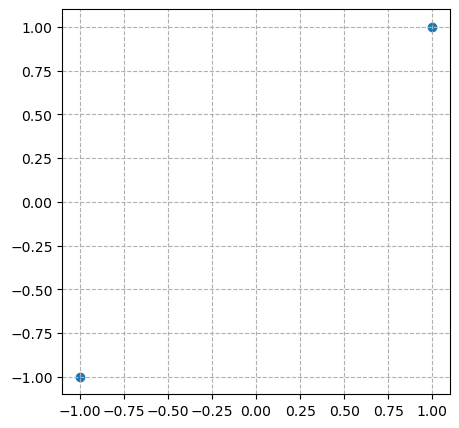

In [28]:
pam.plot_constellation()

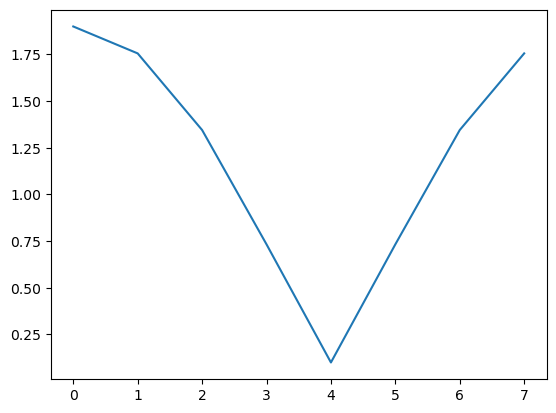

array([[1. , 0. , 0. , 0. , 0. , 0. , 0. , 0.9],
       [0.9, 1. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0.9, 1. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0.9, 1. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0.9, 1. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0.9, 1. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0.9, 1. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0.9, 1. ]])

In [19]:
N = 8
h = [1, 0.9]
H = fft(h, N)
plt.plot(np.abs(H))
plt.show()

P = utils.construct_P(h, 8)
Pofdm = utils.P_to_Pofdm(P)
Pofdm

In [20]:
e = np.sort(np.abs(eigvals(Pofdm)))[::-1]
eigvals = np.concatenate([e[[0]], e[1:N-1:2], e[[N-1]], e[N-2:1:-2]])
eigvals

array([1.9      , 1.7557882, 1.3453624, 0.7329446, 0.1      , 0.7329446,
       1.3453624, 1.7557882])

In [21]:
np.abs(H) == eigvals

array([False, False, False, False, False, False, False, False])

In [27]:
np.isclose(np.abs(H), eigvals)

array([ True,  True,  True,  True,  True,  True,  True,  True])

In [26]:
np.abs(H)[0]

1.9